In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score,StratifiedKFold
from itertools import cycle
warnings.filterwarnings("ignore")

In [52]:
data = pd.read_csv('C:\\Users\\Jyotishman Parasar\\German_credit_analysis\\german_credit_data.csv')

In [53]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [54]:
data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit_amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [56]:
data['Saving accounts'] = data['Saving accounts'].fillna(value = 'NA')

In [57]:
print(data['Saving accounts'].value_counts())

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


In [58]:
data['Checking account'] = data['Checking account'].fillna(value = 'NA')

In [59]:
data['Checking account'].value_counts()

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

Text(0, 0.5, 'Frequency')

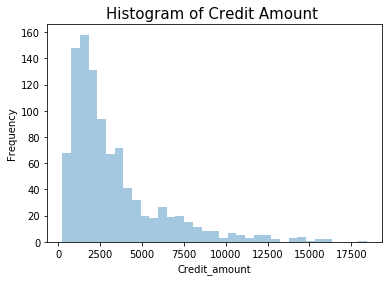

In [60]:
sns.distplot( data.Credit_amount, kde = False )
plt.title( "Histogram of Credit Amount ", fontsize = 15)
plt.ylabel( "Frequency")

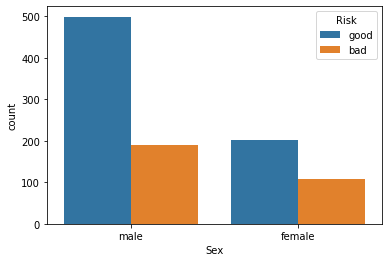

In [61]:
sns.countplot(x= 'Sex', data = data, hue= 'Risk')

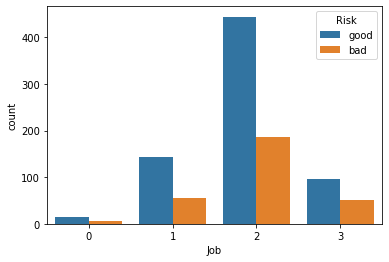

In [62]:
sns.countplot(x= 'Job', data = data, hue= 'Risk')

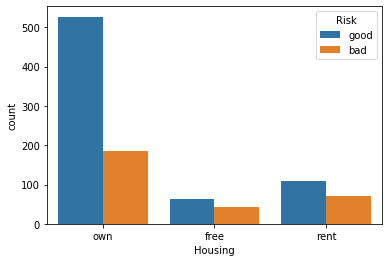

In [63]:
sns.countplot(x= 'Housing', data = data, hue= 'Risk')

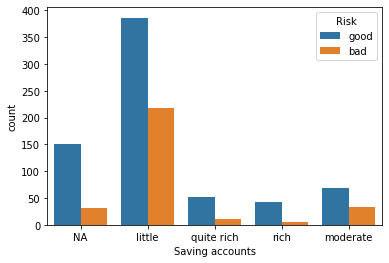

In [64]:
sns.countplot(x= 'Saving accounts', data = data, hue= 'Risk')

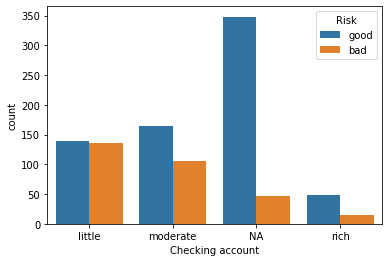

In [65]:
sns.countplot(x= 'Checking account', data = data, hue= 'Risk')

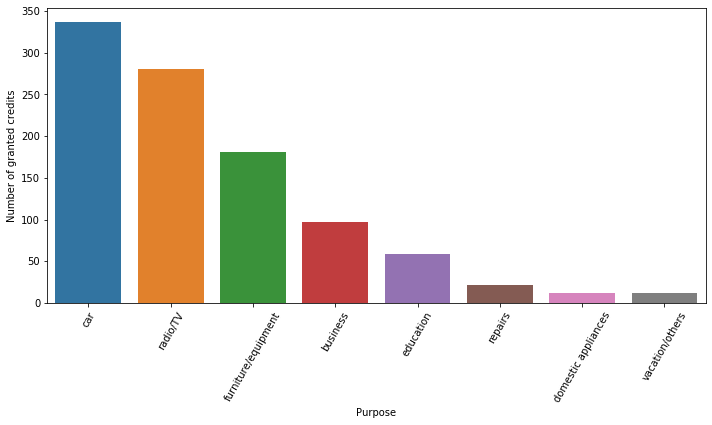

In [69]:
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

In [71]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()
    


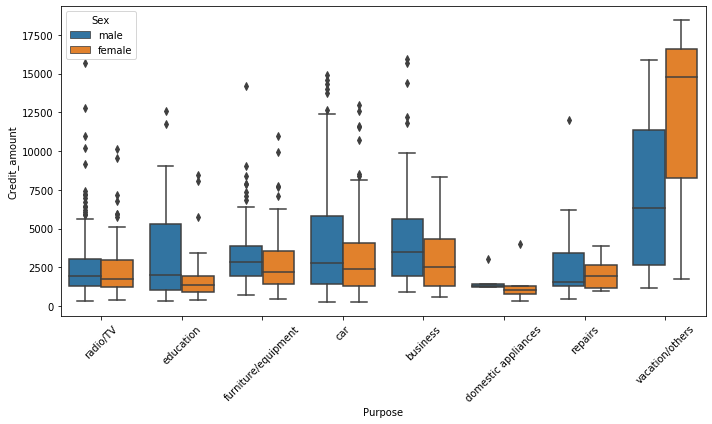

In [73]:
boxes("Purpose","Credit_amount","Sex")

In [74]:
selected_cols = ["Age","Credit_amount", "Duration"]
cluster_data = data.loc[:,selected_cols]

In [75]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit_amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

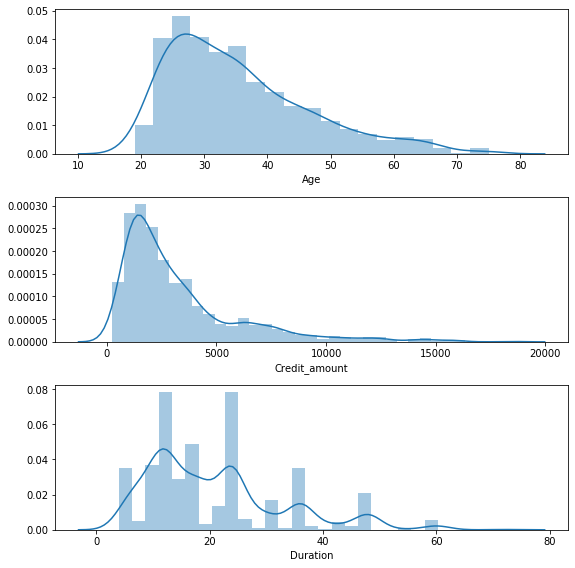

In [76]:
distributions(cluster_data)

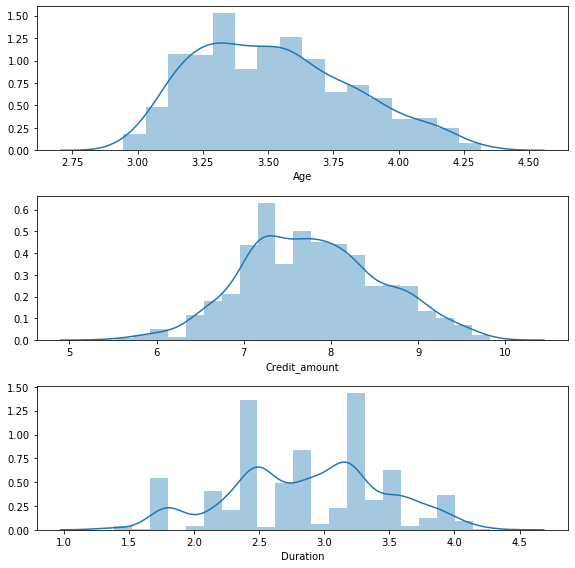

In [77]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)